# Applying dimensionality reduction-PCA

In [7]:
#Import libraries
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import nbimporter
from feature_selection import final_selected_df,y

### Apply PCA to reduce feature dimensionality while maintaining variance

In [2]:
X=final_selected_df

In [3]:
# Apply PCA without specifying n_components
pca = PCA(n_components=None, random_state=42)  
X_pca = pca.fit_transform(X)

# Get explained variance ratio and cumulative variance
explained_var = pca.explained_variance_ratio_   
cum_var = explained_var.cumsum()    

print("Explained variance ratio:", explained_var)
print("Cumulative variance:", cum_var)

Explained variance ratio: [0.29867559 0.14819808 0.11629303 0.10159641 0.09518112 0.06477525
 0.04907235 0.03832336 0.03419424 0.01924582 0.01830151 0.00969421
 0.00351806 0.00293098]
Cumulative variance: [0.29867559 0.44687367 0.5631667  0.66476311 0.75994422 0.82471947
 0.87379182 0.91211518 0.94630942 0.96555524 0.98385675 0.99355096
 0.99706902 1.        ]


### Determine the optimal number of principal components using the explained variance ratio.


In [4]:
# Determine optimal number of components to retain 95% variance

threshold = 0.95
n_components_opt = (cum_var >= threshold).argmax() + 1

print(f"Number of components to retain {int(threshold*100)}% variance: {n_components_opt}")

# Apply PCA again with the optimal number of components

pca_final = PCA(n_components=n_components_opt, random_state=42)
X_pca_final = pca_final.fit_transform(X)

Number of components to retain 95% variance: 10


In [5]:
# Create a DataFrame for PCA-transformed data
pca_columns = [f"PC{i+1}" for i in range(n_components_opt)]
pca_df = pd.DataFrame(X_pca_final, columns=pca_columns)

# Add the target column 
pca_df["num"] = y.values

#final PCA-transformed dataset

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,num
0,-0.695458,0.194354,1.181589,-0.023046,-0.466040,0.952276,0.609198,-0.230973,0.186640,0.378974,0
1,-3.419592,0.808970,-0.234389,-0.913028,0.441515,-0.742795,-1.343941,-0.083989,-0.237455,0.785658,2
2,-2.516728,-1.131841,-0.635060,-0.239924,0.555649,0.379329,0.714414,0.028989,-0.265533,0.056419,1
3,1.246239,-0.436306,1.235981,2.397833,0.923854,1.530107,-0.469925,-0.042117,0.402345,0.381757,0
4,1.810202,-0.415291,0.854905,0.523660,0.440808,0.498276,-0.597453,-0.528284,-0.154078,-0.522940,0


### Visualize PCA results

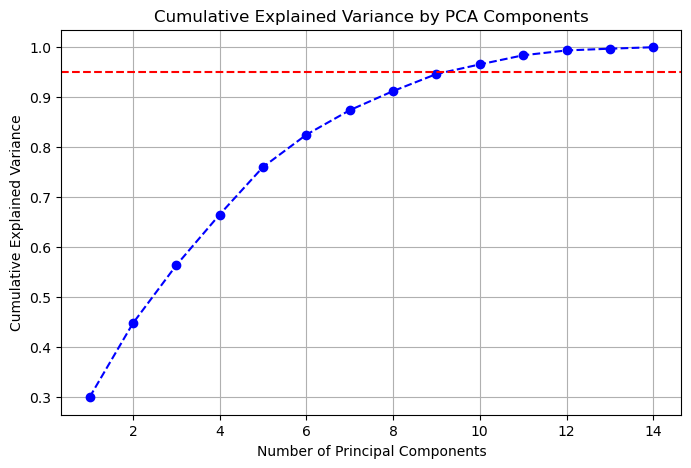

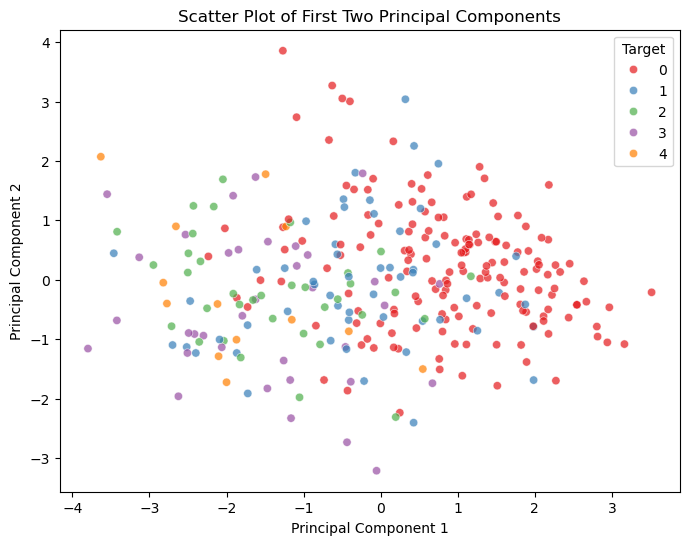

In [6]:
# Cumulative variance plot

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker="o", linestyle="--", color="b")
plt.axhline(y=0.95, color="r", linestyle="--")  # 95% threshold line
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()



# Scatter plot of first two principal components

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_df["PC1"], 
    y=pca_df["PC2"], 
    hue=pca_df["num"],  
    palette="Set1",
    alpha=0.7
)
plt.title("Scatter Plot of First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target")
plt.show()
